## Training the model using cleaned_demographics.csv dataset with PCA applied on it and 2 features considered as principal component features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../Dataset with PCA/pca_demographics.csv')
df.head()

,PC1,PC2,Total Population
0,-0.445547,0.087516,4.0
1,16.537534,14.037633,1216624.0
2,-0.445567,0.087511,2.0
3,-0.282247,0.158660,6559.0
4,-0.381749,0.118858,2496.0


In [4]:
df.columns

Index(['PC1', 'PC2', 'Total Population'], dtype='object')

### Now we have a dataset with only numeric features. Now we split the features into independent and dependent features as x and y respectively. 

In [5]:
x=df.drop('Total Population', axis=1)
y=df['Total Population']

In [6]:
x.head()

,PC1,PC2
0,-0.445547,0.087516
1,16.537534,14.037633
2,-0.445567,0.087511
3,-0.282247,0.158660
4,-0.381749,0.118858


In [7]:
y.head()

0          4.0
1    1216624.0
2          2.0
3       6559.0
4       2496.0
Name: Total Population, dtype: float64

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [10]:
x_train.shape, x_test.shape

((12848, 2), (5507, 2))

In [11]:
x_train.columns

Index(['PC1', 'PC2'], dtype='object')

In [12]:
x_test.head()

,PC1,PC2
10209,-0.443773,0.089960
17345,-0.416959,0.076538
13461,-0.444537,0.090273
7018,-0.444475,0.090229
2475,-0.108035,0.293187


In [13]:
x_test.tail()

,PC1,PC2
2694,-0.435279,0.091856
11465,-0.444402,0.090247
3015,-0.445552,0.087517
17200,-0.433158,0.085496
7896,-0.442293,0.089626


In [14]:
y_test.head()

10209       29.0
17345      704.0
13461        2.0
7018         3.0
2475     13279.0
Name: Total Population, dtype: float64

In [15]:
y_test.tail()

2694     466.0
11465      8.0
3015       3.0
17200    266.0
7896      90.0
Name: Total Population, dtype: float64

### Doing the regression

In [16]:
from sklearn.linear_model import LinearRegression

In [64]:
regression=LinearRegression()

In [65]:
regression.fit(x_train_scaled,y_train)
y_predicted = regression.predict(x_test_scaled)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
accuracy = r2_score(y_test, y_predicted)
mae=mean_absolute_error(y_test, y_predicted)
mse=mean_squared_error(y_test, y_predicted)
print(accuracy)
print(mae)
print(mse)

0.9999748003359833
142.36504661991393
503909.57477386


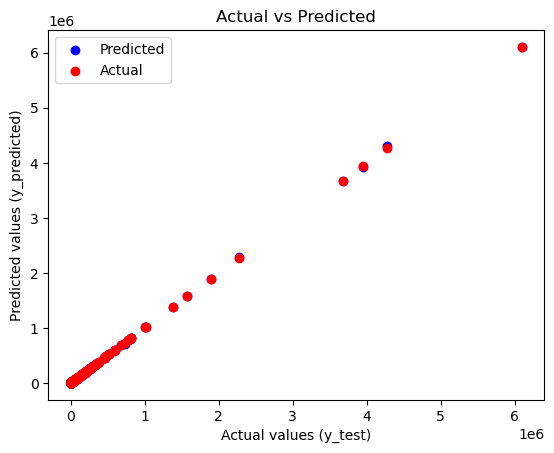

In [90]:
### plotting the actual y_test values and predicted y values using multiple linear regression

plt.scatter(y_test, y_predicted, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predicted)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [69]:
import pickle

In [70]:
with open('demographics.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [71]:
with open('demographics.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df) 
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 711.8873750806688


In [72]:
with open('demographics.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [0.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df) 
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 12770.35983626004


### Decission Tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)
dt_predictions = dt_model.predict(x_test_scaled)

dt_mae=mean_absolute_error(y_test,dt_predictions)
dt_accuracy=r2_score(y_test,dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(dt_accuracy)
print(dt_mae)
print(dt_mse)


0.9387697677307991
1609.3595808358598
1224401257.317095


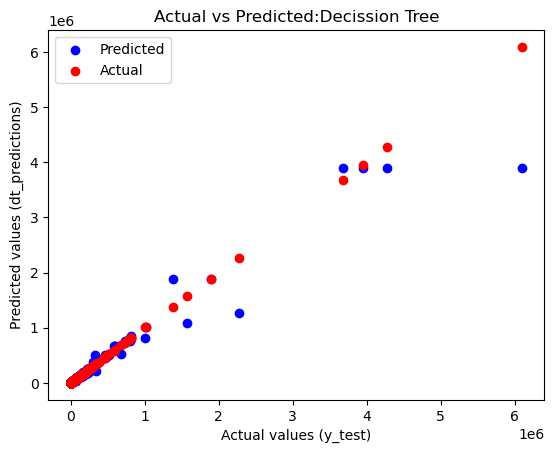

In [95]:
### plotting the actual y_test values and the predicted y values using decission tree regressor

plt.scatter(y_test, dt_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (dt_predictions)')
plt.title('Actual vs Predicted:Decission Tree')
plt.legend()
plt.show()


In [75]:
with open('demographics_decission_tree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [76]:
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}


test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 725.0


In [77]:
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13271.0


In [78]:
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


test_data = {
    'Female 0-4': [22.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [111.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [18.0],
    'Male 5-11': [0.0],
    'Male 5-17': [77.0],
    'Male 18-59': [132.0],
    'Male 60+': [2.0],
    'M: Unknown': [0.0]
}


test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 486.0


### Random Forest Regression

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)
rf_predictions = rf_model.predict(x_test_scaled)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae= mean_absolute_error(y_test,rf_predictions)
rf_accuracy=r2_score(y_test,rf_predictions)
print(rf_accuracy)
print(rf_mae)
print(rf_mse)


0.9850746353948879
1143.8511882959729
298457714.6150648


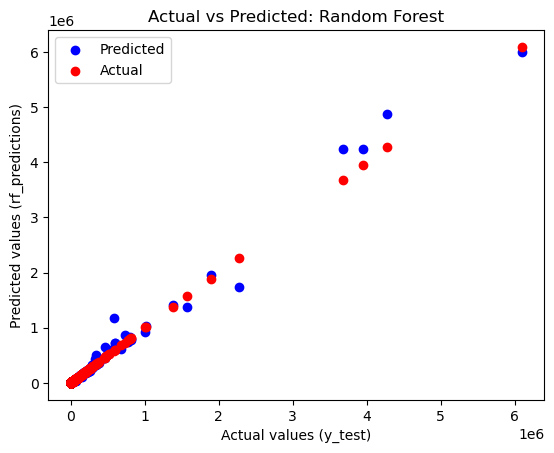

In [96]:
### plotting the actual y_test values and the predicted y_test values using random forest regressor

plt.scatter(y_test, rf_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (rf_predictions)')
plt.title('Actual vs Predicted: Random Forest')
plt.legend()
plt.show()


In [80]:
with open('demographics_random_forest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [81]:
with open('demographics_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 722.3


In [82]:
with open('demographics_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df) 
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13141.53


### XGBoost Regression

In [83]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(x_train_scaled, y_train)
xgb_predictions = xgb_model.predict(x_test_scaled)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae=mean_absolute_error(y_test,xgb_predictions)
xgb_accuracy = r2_score(y_test,xgb_predictions)
print(xgb_accuracy)
print(xgb_mae)
print(xgb_mse)


0.9551883345193266
1721.7499018368324
896084458.9937682


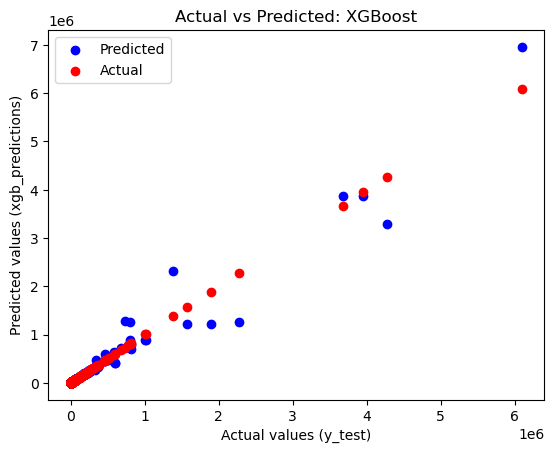

In [97]:
### plootting the actual y_test values and the predicted y_test values using xgboost regressor


plt.scatter(y_test, xgb_predictions, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (xgb_predictions)')
plt.title('Actual vs Predicted: XGBoost')
plt.legend()
plt.show()


In [84]:
with open('demographics_xgboost.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [85]:
with open('demographics_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_1_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_1_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 722.3


In [86]:
with open('demographics_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

test_df = pd.DataFrame(test_data)
x_data_2_model_testing_after_training = scaler.transform(test_df)
predictions = loaded_model.predict(x_data_2_model_testing_after_training)
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13141.53
